In [87]:
"""
import statements:

"""

#classics
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv

# plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm

# NLP Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()


from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/runpy.py:193: UserWarning: [W019] Changing vectors name from en_model.vectors to en_model.vectors_684831, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


In [2]:
pwd

'/Users/jorge/CS-Data-Science-Build-Week-1/notebooks'

In [3]:
ls

explore_movie_dataset.ipynb   movie_genre_prediction.ipynb


## Loading Data

In [64]:
file_path = "/Users/jorge/CS-Data-Science-Build-Week-1/data/MovieSummaries/movie.metadata.tsv"
df = pd.read_csv(file_path, sep = '\t', header = None)

df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [65]:
df.dtypes

0      int64
1     object
2     object
3     object
4    float64
5    float64
6     object
7     object
8     object
dtype: object

In [6]:
# lets rename our columns:
meta_data.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [7]:
file_path_01 = "/Users/jorge/CS-Data-Science-Build-Week-1/data/MovieSummaries/plot_summaries.txt"
plots = []

with open(file_path_01, 'r') as f:
    reader = csv.reader(f, dialect='excel-tab') 
    for row in tqdm(reader):
        plots.append(row)

42303it [00:01, 39176.05it/s]


In [8]:
movie_id = []
plot = []

for i in tqdm(plots):
    movie_id.append(i[0])
    plot.append(i[1])

100%|██████████| 42303/42303 [00:00<00:00, 1217286.24it/s]


In [9]:
films = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

In [10]:
films.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


## Data Exploration

In [11]:
# here we are changing our datatype of 'movie_id'
meta_data['movie_id'] = meta_data['movie_id'].astype(str)

# here we will merge our meta_data with our films
films = pd.merge(films, meta_data[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

In [12]:
films.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [215]:
films.tail()

,movie_id,plot,movie_name,genre,new_genre
42199,34808485,"The story is about Reema , a young Muslim schoolgirl in Malabar, who loved Malayalam and poetry. The film is about her mental trauma once she was moved to an English medium school by her parents, for their social status.",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's]
42200,1096473,"In 1928 Hollywood, director Leo Andreyev looks through photographs for actors for his next movie. When he comes to the picture of an aged Sergius Alexander , he pauses, then tells his assistant to cast the man. Sergius shows up at the Eureka Studio with a horde of other extras and is issued a ...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indie"", ""/m/01g6gs"": ""Black-and-white"", ""/m/04xvlr"": ""Period piece"", ""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film"", ""/m/03mqtr"": ""Political drama""}","[Silent film, Indie, Black-and-white, Period piece, Drama, War film, Political drama]"
42201,35102018,"American Luthier focuses on Randy Parsons’ transformation from aspiring musician to guitar-maker. The guitar had been Parsons’ identity since he was a child, but after studying classical and jazz guitar in college, he realized that he would never make a living as a musician. So he gave it up — h...",Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music"", ""/m/03bxz7"": ""Biographical film"", ""/m/0jtdp"": ""Documentary""}","[Short Film, Music, Biographical film, Documentary]"
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit seller from Afghanistan, comes to Calcutta to hawk his merchandise and befriends a small Bengali girl called Mini who reminds him of his own daughter Amina back in Afghanistan. He puts up at a boarding house along with his countrymen. Since he is shor...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama]
42203,6040782,"1940 - Operation Dynamo has just taken place. From the newly conquered French coastline, a Wehrmacht colonel looks out over the English Channel with powerful binoculars. Surveying the white cliffs of Dover, he spies Godfrey emerging from a lavatory. Godfrey joins the rest of his platoon, who are...",Dad's Army,"{""/m/01z4y"": ""Comedy""}",[Comedy]


In [218]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 42203
Data columns (total 5 columns):
movie_id      42204 non-null object
plot          42204 non-null object
movie_name    42204 non-null object
genre         42204 non-null object
new_genre     42204 non-null object
dtypes: object(5)
memory usage: 3.2+ MB


In [225]:
# nulls as missing values. 
# We'll subset our data by choosing ALL the rows that have missing values.

print('The number of rows with Missing Values are: ')
films.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


0

In [13]:
films['genre'][29]

'{"/m/04t36": "Musical", "/m/02l7c8": "Romance Film", "/m/01z4y": "Comedy", "/m/01chg": "Bollywood"}'

In [14]:
type(json.loads(films['genre'][29]))

dict

In [15]:
json.loads(films['genre'][29]).values()

dict_values(['Musical', 'Romance Film', 'Comedy', 'Bollywood'])

In [16]:
genres = []

for i in films['genre']:
    genres.append(list(json.loads(i).values()))
    
films['new_genre'] = genres

In [17]:
# lets remove our samples with zero genre tags
new_films = films[~(films['new_genre'].str.len() == 0)]

In [18]:
new_films.shape, films.shape

((41793, 5), (42204, 5))

In [19]:
new_films.head()

,movie_id,plot,movie_name,genre,new_genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"


In [20]:
# lets get all of our genre tags in a list:
all_genres = sum(genres,[])
len(set(all_genres))

363

In [21]:
all_genres = nltk.FreqDist(all_genres)
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

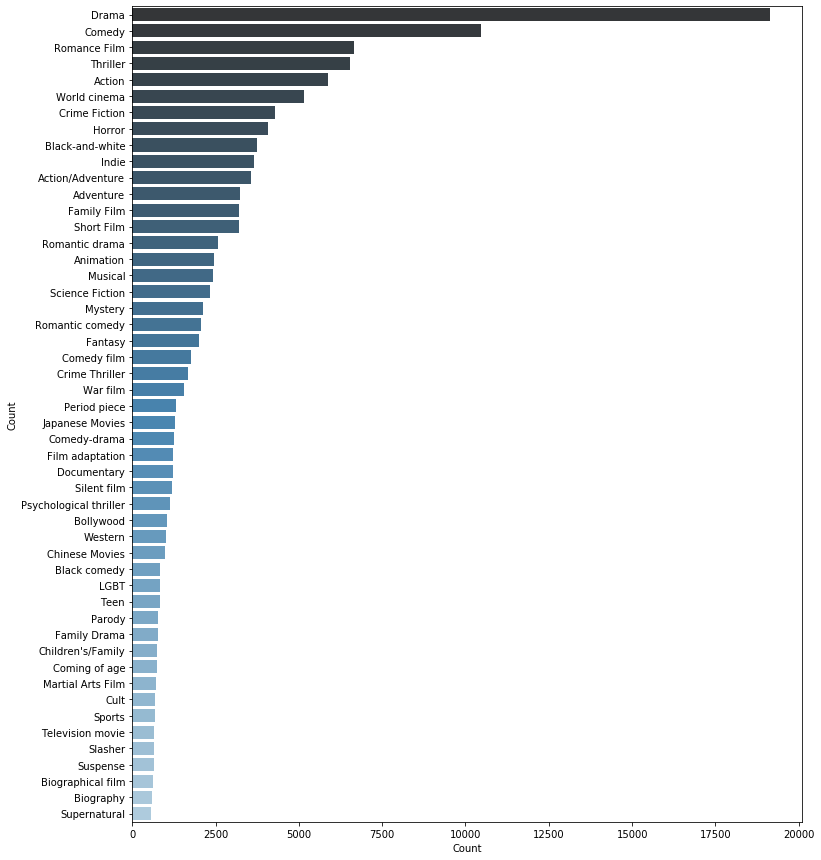

In [229]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre", palette ="Blues_d")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
# Lets make a function to get rid of all of our symbols
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    
    return text

In [25]:
new_films['clean_our_plot'] = new_films['plot'].apply(lambda x: clean_text(x))

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
new_films[['plot', 'clean_our_plot']].sample(5)

,plot,clean_our_plot
4234,"Marvin Blake is a sharecropper's son who wants to better himself by studying for a college education instead of working in the fields under the heat in the Deep South. Initially, greedy Peckerwood plantation owner Lane Norwood is opposed to the idea and says he needs to work in his fields, but a...",marvin blake is a sharecroppers son who wants to better himself by studying for a college education instead of working in the fields under the heat in the deep south initially greedy peckerwood plantation owner lane norwood is opposed to the idea and says he needs to work in his fields but after...
12169,"Dave Kovic runs a temporary employment agency in Georgetown, Washington, D.C., and, as a side job, makes appearances impersonating President Bill Mitchell , whom he resembles, at events such as automobile dealerships and supermarket openings. He is requested by Secret Service agent Duane Steven...",dave kovic runs a temporary employment agency in georgetown washington d c and as a side job makes appearances impersonating president bill mitchell whom he resembles at events such as automobile dealerships and supermarket openings he is requested by secret service agent duane stevensen to make...
41436,"Toy manufacturer Clifford Groves is married to Marion, with three kids, but lately life has become drab and routine. A former co-worker, Norma Miller Vale, turns up unexpectedly and is now a glamorous fashion designer. Marion has to pull out of a planned vacation but urges Cliff to go alone. The...",toy manufacturer clifford groves is married to marion with three kids but lately life has become drab and routine a former co worker norma miller vale turns up unexpectedly and is now a glamorous fashion designer marion has to pull out of a planned vacation but urges cliff to go alone there he r...
36844,"A preacher from the East arrives in Montana to spread the gospel. When his wife takes off with another man, he straps on his pistol and seeks vengeance. Then he must find a way to redeem himself.",a preacher from the east arrives in montana to spread the gospel when his wife takes off with another man he straps on his pistol and seeks vengeance then he must find a way to redeem himself
2309,"Claire McKay —having suffered the death of her boyfriend—is brought by her mother to Ironbound Island in the hopes that time away from the city will allow her to recover emotionally. On the island where her mother was born, Claire meets an eccentric writer, Celia , who in flashbacks, relates her...",claire mckay having suffered the death of her boyfriend is brought by her mother to ironbound island in the hopes that time away from the city will allow her to recover emotionally on the island where her mother was born claire meets an eccentric writer celia who in flashbacks relates her own st...


In [70]:
new_films.head()

,movie_id,plot,movie_name,genre,new_genre,clean_our_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxophonist develop bizarre love hate relationship despite prejudices realize arent different
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]",nation panem consists wealthy capitol twelve poorer districts punishment past rebellion district must provide boy girl ages selected lottery annual hunger games tributes must fight death arena sole survivor rewarded fame wealth first reaping year old primrose everdeen chosen district older siste...
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six years prison life murdering classmate induchoodan son justice maranchery karunakara menon framed case manapally madhavan nambiar crony dysp sankaranarayanan take revenge idealist judge menon earlier given jail sentence manapally corruption case induchoodan achi...
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]",lemon drop kid new york city swindler illegally touting horses florida racetrack several successful hustles kid comes across beautiful gullible woman intending bet lot money kid convinces switch bet employing prefabricated con unfortunately kid woman belongs notorious gangster moose moran money ...
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]",seventh day adventist church pastor michael chamberlain wife lindy two sons nine week old daughter azaria camping holiday outback baby sleeping tent family enjoying barbecue fellow campers cry heard lindy returns tent check azaria certain sees dingo something mouth running approaches discovers i...


In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/jorge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Removing stopwords

In [35]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
new_films['clean_our_plot'] = new_films['clean_our_plot'].apply(lambda x: remove_stopwords(x))

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Converting our text into features:

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new_films['new_genre'])

# transform target variable
y = multilabel_binarizer.transform(new_films['new_genre'])

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [42]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(new_films['clean_our_plot'], y, test_size=0.2, random_state=9)

In [43]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

## Building Prediction model with Logistic Regression for a quick test:

In [45]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [46]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 48 is present in all training examples.
  str(classes[c]))
/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 182 is present in all training examples.
  str(classes[c]))
/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 214 is present in all training examples.
  str(classes[c]))
/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [47]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [50]:
y_pred[29]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
multilabel_binarizer.inverse_transform(y_pred)[29]

('Drama',)

In [52]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.31540448604823657

In [53]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [54]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [55]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.4378137883178906

## inference function:

In [56]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [62]:
for i in range(5):
    k = xval.sample(1).index[0]
    print("Movie: ", new_films['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",new_films['new_genre'][k], "\n")

Movie:  Spring Break '83 
Predicted genre:  [()]
Actual genre:  ['Comedy'] 

Movie:  Blood Car 
Predicted genre:  [()]
Actual genre:  ['Parody', 'Horror', 'Cult', 'Satire', 'Comedy', 'Black comedy', 'Horror Comedy'] 

Movie:  Guns of the Timberland 
Predicted genre:  [('Drama',)]
Actual genre:  ['Western'] 

Movie:  Twitches Too! 
Predicted genre:  [('Comedy', 'Romance Film')]
Actual genre:  ['Family Film', 'Comedy', 'Teen', 'Television movie'] 

Movie:  The War on Democracy 
Predicted genre:  [('Documentary',)]
Actual genre:  ['Culture & Society', 'History', 'War film', 'Political cinema', 'Social issues', 'Documentary'] 



## Using Spacy to tokenize the listings 

In [66]:
nlp = spacy.load('en_core_web_lg')

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/runpy.py:193: UserWarning: [W019] Changing vectors name from en_model.vectors to en_model.vectors_684831, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


In [67]:
#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [84]:
#Tokenizer Pipe

tokens = []

# Make the tokens
for doc in nlp.pipe(new_films['clean_our_plot'], disable=['tagger', 'parser', 'ner']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
           doc_tokens.append(token.text)
   
    tokens.append(doc_tokens)
    
new_films['tokens'] = tokens

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [85]:
new_films['tokens'].head()

0                                                                                                                                                           [shlykov, hard, working, taxi, driver, lyosha, saxophonist, develop, bizarre, love, hate, relationship, despite, prejudices, realize, nt, different]
1    [nation, panem, consists, wealthy, capitol, poorer, districts, punishment, past, rebellion, district, provide, boy, girl, ages, selected, lottery, annual, hunger, games, tributes, fight, death, arena, sole, survivor, rewarded, fame, wealth, reaping, year, old, primrose, everdeen, chosen, distric...
2    [poovalli, induchoodan, sentenced, years, prison, life, murdering, classmate, induchoodan, son, justice, maranchery, karunakara, menon, framed, case, manapally, madhavan, nambiar, crony, dysp, sankaranarayanan, revenge, idealist, judge, menon, earlier, given, jail, sentence, manapally, corruptio...
3    [lemon, drop, kid, new, york, city, swindler, illegally, touting, horses, florid

In [93]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

new_films['lemmas'] = new_films['clean_our_plot'].apply(get_lemmas)

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [94]:
print(new_films.shape)
new_films.head()

(41793, 8)


,movie_id,plot,movie_name,genre,new_genre,clean_our_plot,lemmas,tokens
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxophonist develop bizarre love hate relationship despite prejudices realize arent different,"[shlykov, hard, work, taxi, driver, lyosha, saxophonist, develop, bizarre, love, hate, relationship, despite, prejudice, realize, not, different]","[shlykov, hard, working, taxi, driver, lyosha, saxophonist, develop, bizarre, love, hate, relationship, despite, prejudices, realize, nt, different]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]",nation panem consists wealthy capitol twelve poorer districts punishment past rebellion district must provide boy girl ages selected lottery annual hunger games tributes must fight death arena sole survivor rewarded fame wealth first reaping year old primrose everdeen chosen district older siste...,"[nation, panem, consist, wealthy, capitol, poor, district, punishment, past, rebellion, district, provide, boy, girl, age, selected, lottery, annual, hunger, games, tributes, fight, death, arena, sole, survivor, rewarded, fame, wealth, reaping, year, old, primrose, everdeen, chosen, district, ol...","[nation, panem, consists, wealthy, capitol, poorer, districts, punishment, past, rebellion, district, provide, boy, girl, ages, selected, lottery, annual, hunger, games, tributes, fight, death, arena, sole, survivor, rewarded, fame, wealth, reaping, year, old, primrose, everdeen, chosen, distric..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six years prison life murdering classmate induchoodan son justice maranchery karunakara menon framed case manapally madhavan nambiar crony dysp sankaranarayanan take revenge idealist judge menon earlier given jail sentence manapally corruption case induchoodan achi...,"[poovalli, induchoodan, sentenced, year, prison, life, murdering, classmate, induchoodan, son, justice, maranchery, karunakara, menon, frame, case, manapally, madhavan, nambiar, crony, dysp, sankaranarayanan, revenge, idealist, judge, menon, earlier, given, jail, sentence, manapally, corruption,...","[poovalli, induchoodan, sentenced, years, prison, life, murdering, classmate, induchoodan, son, justice, maranchery, karunakara, menon, framed, case, manapally, madhavan, nambiar, crony, dysp, sankaranarayanan, revenge, idealist, judge, menon, earlier, given, jail, sentence, manapally, corruptio..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy

## Using Scikit-Learn's CountVectorizer to get word counts for each listing.

In [95]:
# create the transformer:
vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(new_films['clean_our_plot'])

# Get sparse dtm
dtm = vect.transform(new_films['clean_our_plot'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,aa,aaa,aaaaaaaaaaaaahhhhhh,aaaaaaaaah,aaaaaaaah,aaaaaaah,aaaaarrrrrrggghhh,aaaah,aaaahhh,aaan,...,zygrot,zyklon,zym,zyms,zyprexa,zyra,zythum,zyzaks,zyzzyx,zzyzx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
dtm.shape

(41793, 152476)

In [98]:
doc_len = [len(doc) for doc in new_films]

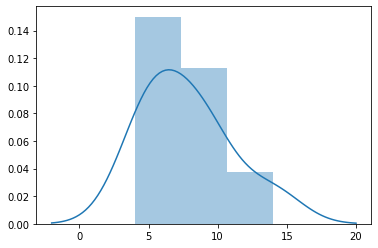

In [99]:
sns.distplot(doc_len)
plt.show()

In [100]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [102]:
from collections import Counter

wc = count(new_films['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
948,film,12354,20384,1.0,0.003089,0.003089,0.295600
276,tells,9441,18938,2.0,0.002869,0.005958,0.225899
919,man,10689,18846,3.0,0.002856,0.008814,0.255761
327,father,9162,18615,4.0,0.002821,0.011634,0.219223
196,time,11607,18124,5.0,0.002746,0.014380,0.277726


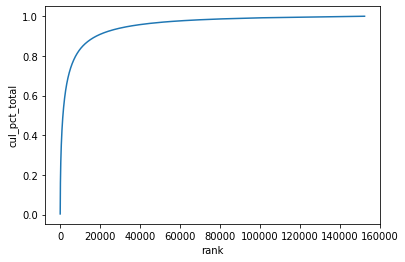

In [105]:
# cumlative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

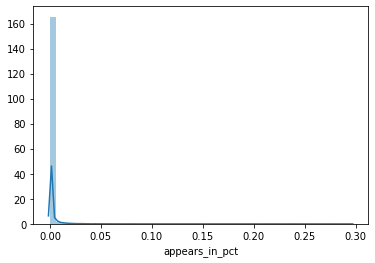

In [106]:
# Frequency of apperances
sns.distplot(wc['appears_in_pct'])
plt.show()

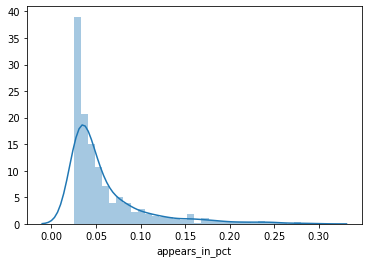

In [107]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct'])
plt.show()

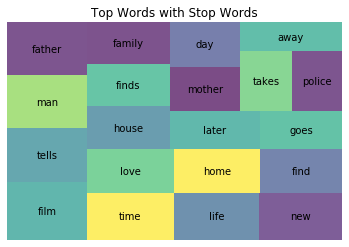

In [110]:
import squarify

wc = count(new_films['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.title('Top Words with Stop Words')
plt.axis('off')
plt.show()

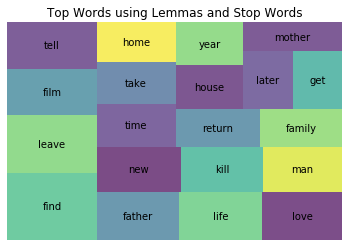

In [111]:
wc = count(new_films['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7 )
plt.axis('off')
plt.title('Top Words using Lemmas and Stop Words')
plt.show()

## Using Scikit-Learn's tfidVectorizer to get a TF-IDF feature matrix

In [112]:
# instantiate vectorizer object:
tfidf = TfidfVectorizer(max_df=.97,
                        min_df=3,
                        stop_words='english')

# create a vocabulary and get word counts per document:
dtm_tfidf = tfidf.fit_transform(new_films['clean_our_plot'])

# print word counts

# get feature names to use as dataframe column headers:
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# view Feature Matrix as DataFrame:
dtm_tfidf.head()

,aa,aaa,aadhi,aadhis,aadi,aadmi,aah,aaj,aakash,aakashs,...,zu,zuba,zuckerman,zulu,zulus,zurg,zurich,zuzu,zwarte,zx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating a NearestNeighbor Model. Write film description of your ideal summary and query your film genre.

In [113]:
# fit on dtm_tfidf:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [209]:
from fuzzywuzzy import process

def movie_recommender(movie_name):
    
    index = process.extractOne(movie_name, new_films['movie_name'])
    print(index)
    
movie_recommender('The Hunger Games')

('The Hunger Games', 100, 1)


In [ ]:
movie_users=new_films.pivot(index='movieId', columns='userId',values='rating').fillna(0)
matrix_movies_users=csr_matrix(movie_users.values)

In [179]:
# # Recommender(movie_name) => List of Movies recommended

def movie_recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    index=process.extractOne(movie_name, new_films['movie_name'])[2]
    print('Movie Selected: ',new_films['movie_name'][index], 'Index: ',index)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[index])
    print(distances, idices)
    for i in indices:
        print(new_films['movie_name'][i].where(i!=index))
    
movie_recommender('The Godfather', new_films, nn,10)

In [212]:
film_description =['nation panem consists wealthy capitol twelve poorer districts punishment past rebellion district must provide boy girl ages selected lottery annual hunger games tributes must fight death arena sole survivor rewarded fame wealth first reaping year old primrose']   

In [213]:
film_search = tfidf.transform(film_description)

In [214]:
nn.kneighbors(film_search.todense())

(array([[1.11084178, 1.33491564, 1.33638185, 1.33768351, 1.33949776]]),
 array([[    1,   956, 40120, 32687,  1364]]))

In [210]:
new_films['movie_name'].iloc[ 1]

'The Hunger Games'